# **Data Visualisation**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
sns.set_style("white")
from matplotlib.image import imread

# Change working directory

In [2]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\cmjim\\ml_pp5_drowsiness_detector\\jupyter_notebooks'

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir('C:\\Users\\cmjim\\ml_pp5_drowsiness_detector')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
work_dir = os.getcwd()
work_dir

'C:\\Users\\cmjim\\ml_pp5_drowsiness_detector'

##  Set Input Directories

Set train, validation, and test directories

In [5]:
my_data_dir = r'inputs\drowsiness'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

---

## Set Output Directories

In [6]:
version = 'v3'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir +
                                                                  '/outputs'):
    print(f'Old version is already available, change version variable'
          f'and create a new version.')
    pass
else:
    os.makedirs(name=file_path)

## Set Label Names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['Awake', 'Drowsy']


---

# Data Visualisation of Image Data

---

## Calculate Average Image Size for Training Set

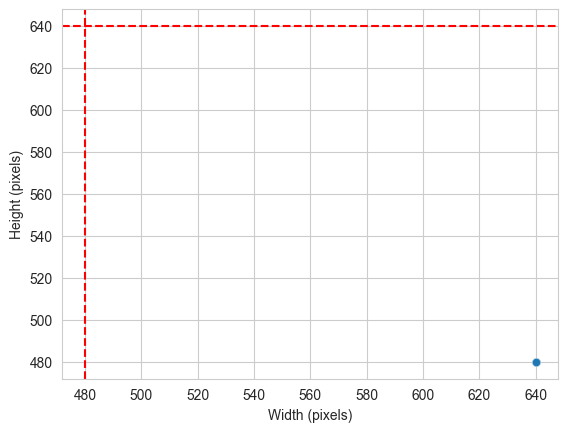

Width average: 640 
Height average: 480


In [8]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/'+ label):
        img = imread(train_path + '/' + label + '/'+ image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)
        dim2.append(d2)
        

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean().round())
dim2_mean = int(np.array(dim2).mean().round())
axes.axvline(x=dim1_mean, color='r', linestyle='--')
axes.axhline(y=dim2_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

## Image Sizing for Training Model

The size will be a quarter of the average from all the images in the train set to increase speed of model training

In [9]:
image_shape = (120, 160, 3)
image_shape

(120, 160, 3)

## Save the Image Shape Embeddings

In [10]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v3/image_shape.pkl']

---